# Visualizing Time Series Data in Python

In this project we will see the kinds of charts that are used to visualize *`time series data`*.

- Line Chart
- Area Plot
- Bar Plot
- Heatmaps

We will use the input excel file that has “Years” and “Sales” information for each month for around 10 years.

Let's start with importing all necessary libraries.

In [1]:
import numpy as np # numerical python
import pandas as pd # pannel datasets
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# load the dataset
df = pd.read_excel('Debourgh-Sales.xlsx',sheet_name='Sheet2')
df.head()

,Years,Sales
0,2001-01-01,139.7
1,2001-02-01,114.3
2,2001-03-01,101.6
3,2001-04-01,152.4
4,2001-05-01,215.9


Now it is important to find the is there are any missing values and data types of each column and number of instances in the dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Years   108 non-null    datetime64[ns]
 1   Sales   108 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.8 KB


From the results, there are 108 entries with and no missing values. and the data type of Years is datetime64 and Sales is float64. Now it is convenient to plot the line plot with this data.

# 1. Line Chart

A line chart is the most common way of visualizing the time series data. 
Line chart particularly on the *x-axis*, you will place the `time` and on the *y-axis*, you will use `independent values` like the price of the stock price, sale in each quarter of the month, etc.

We will see two ways to plot the `line plot`.

## 1.1 Using Seaborn

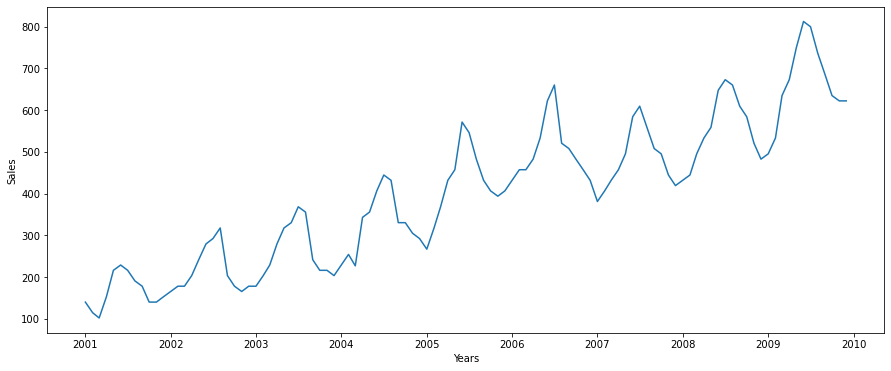

In [4]:
plt.figure(figsize=(15,6))
sns.lineplot(x='Years',y='Sales',data=df)
plt.show()

## 1.2 Using Pandas dataframe

In order to plot with a pandas data frame, we need to set index to DateTime values i.e., Years, and then we need to visualize the graph.

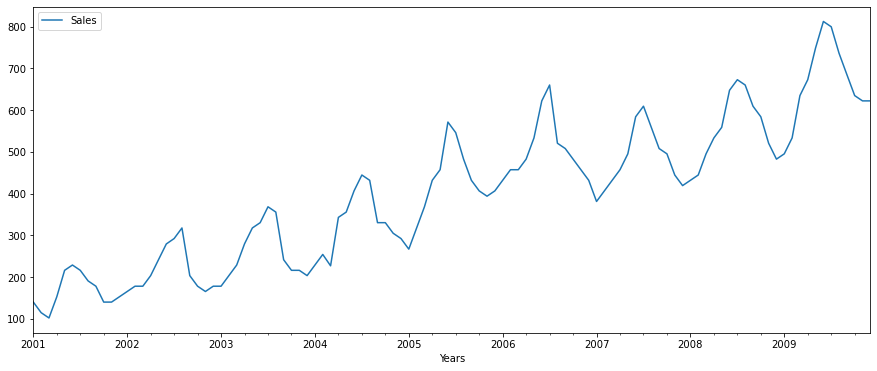

In [5]:
dfp = df.set_index('Years') # setting "Years" as index
fig,ax = plt.subplots(figsize=(15,6))
dfp.plot(kind='line',ax=ax)
plt.show()

# Hue the Line plot

We can color your line plot based on years. In order to do that we need to extract years from the date. We will see how to extract the year and quarter from the Years column.

In [6]:
df['year'] = df['Years'].dt.year  # extracting year
df['quarter'] = df['Years'].dt.quarter # extracting quarter
df.head()

,Years,Sales,year,quarter
0,2001-01-01,139.7,2001,1
1,2001-02-01,114.3,2001,1
2,2001-03-01,101.6,2001,1
3,2001-04-01,152.4,2001,2
4,2001-05-01,215.9,2001,2


As you see from the results we can easily extract the year and quarter from the Years column using pandas. Now using the above data frame we visualize the line chart by coloring to each year differently.

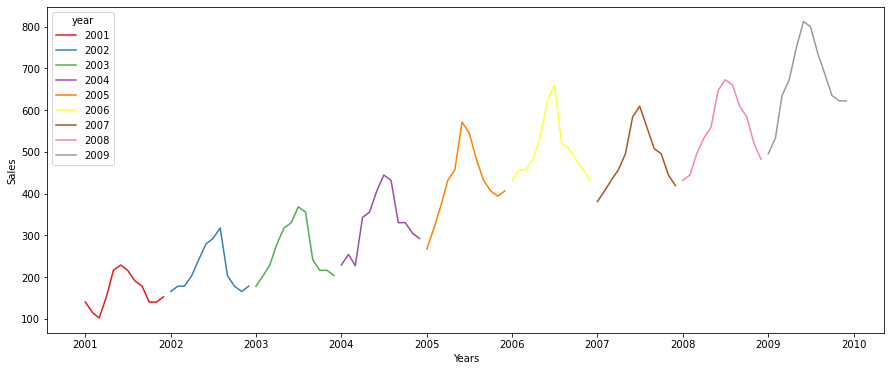

In [7]:
plt.figure(figsize=(15,6))
sns.lineplot(x='Years',y='Sales',data=df,hue='year',palette='Set1')
plt.show()

# 2. Bar Plot

**We cannot directly visualize the bar plot in time series data.** 

As bar plot is used for categorical data, we need to extract a few more information out of it.
So, here we need to **create categories** and with those categories, we need to visualize the bar plot. We will see three kinds of bars plot “Bar plot”, “Proposition Bar plot” and “Stacked Bar Plot”. Let’s see one by one.

## 2.1 Bar Plot

We will make the categorical data by getting of average or sum of all sales in each year, and average or sum of all sales in each quarter.

Let us visualize the sum of all sales each year. We can do that using group of “Sales” and “year” and group by “year”.

In [8]:
df_year = df[['Sales','year']].groupby(by='year').sum().reset_index()
df_year

,year,Sales
0,2001,1968.5
1,2002,2577.8
2,2003,3136.9
3,2004,3947.8
4,2005,5080.0
5,2006,6045.2
6,2007,5791.2
7,2008,6642.1
8,2009,8000.7


As you can see that we got the sum of sales from each year and now let’s visualize the bar plot with **seaborn** as shown below.

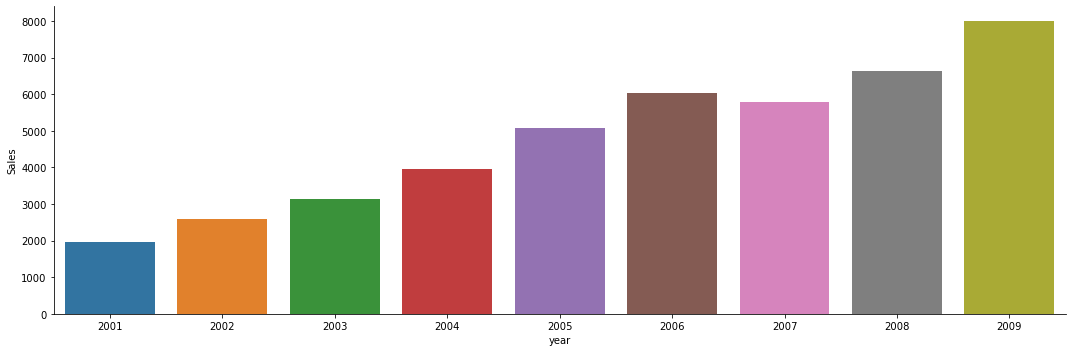

In [9]:
sns.catplot(x='year',y='Sales',data=df_year,kind='bar',aspect=3)

Let’s visualize the bar plot even with a **pandas data frame**.

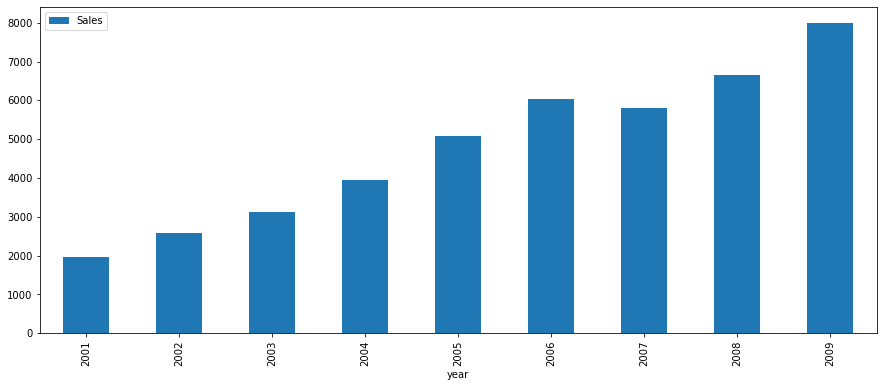

In [10]:
fig, ax = plt.subplots(figsize=(15,6))
df_year.set_index('year').plot(kind='bar',ax=ax)
plt.show()

## 2.2 Proposition Bar Plot

The Proposition bar plot is commonly used to compare more than two variables.. like comparing the sales based on quarter and year. 

In order to compare the results we need to do the group by `year` and `quarter` and with those values, we need to reshape into the desired format as shown in the below code.

In [11]:
sales = df[['Sales','year','quarter']].groupby(by=['year','quarter']).sum().values
df_sales = pd.DataFrame(sales.reshape(9,4),index=list(range(2001,2010)),columns=['Q1','Q2','Q3','Q4'])
df_sales

,Q1,Q2,Q3,Q4
2001,355.6,596.9,584.2,431.8
2002,520.7,723.6,812.8,520.7
2003,609.6,927.1,965.2,635.0
2004,709.3,1104.9,1206.5,927.1
2005,952.5,1460.5,1460.5,1206.5
2006,1346.2,1638.3,1689.1,1371.6
2007,1219.2,1536.7,1676.4,1358.9
2008,1371.6,1739.9,1943.1,1587.5
2009,1663.7,2235.2,2222.2,1879.6


Here we bring the data with `index as years`, `column as a quarte`r, and the `values are sums of total sales` in the data. With the data above you can plot the proposition bar plot using pandas as shown below.

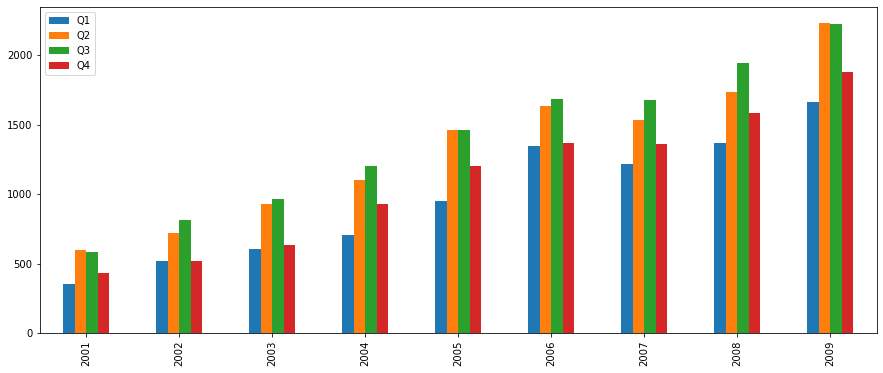

In [12]:
fig,ax = plt.subplots(figsize=(15,6))
df_sales.plot(kind='bar',ax=ax)
plt.show()

## 2.3 Stacked Bar Plot

The stacked bar plot is the same as the proposition bar plot. But in the stacked bar plot we put all the bar on top of each bar as shown below. We can plot a stacked bar plot by just set the parameter `stacked` to True.

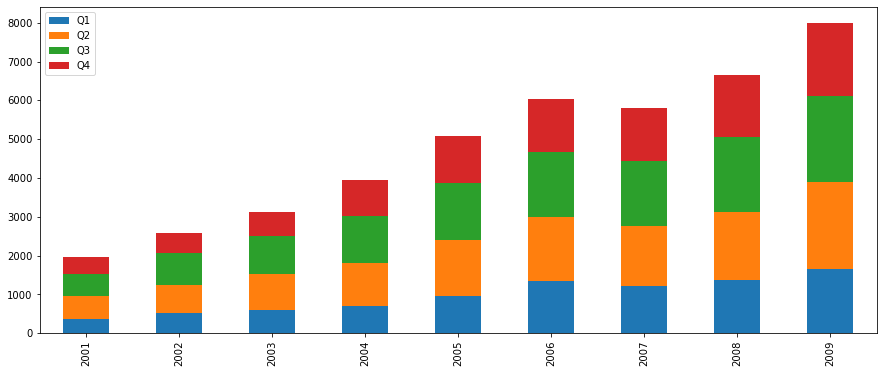

In [13]:
fig,ax = plt.subplots(figsize=(15,6))
df_sales.plot(kind='bar',ax=ax,stacked=True)
plt.show()

# 3. Area Plot


The area plot is a combination of **line-chart** and **bar plot**. 

Just like a bar, we have different types of area plots like Area chart, proposition area chart, and stacked area chart.

## 3.1 Area Plot using pandas

We can plot the area charts using pandas simply setting the parameter kind to “area”. This is much more similar to the line plot but the area plot filled the portion of the area with blue color.

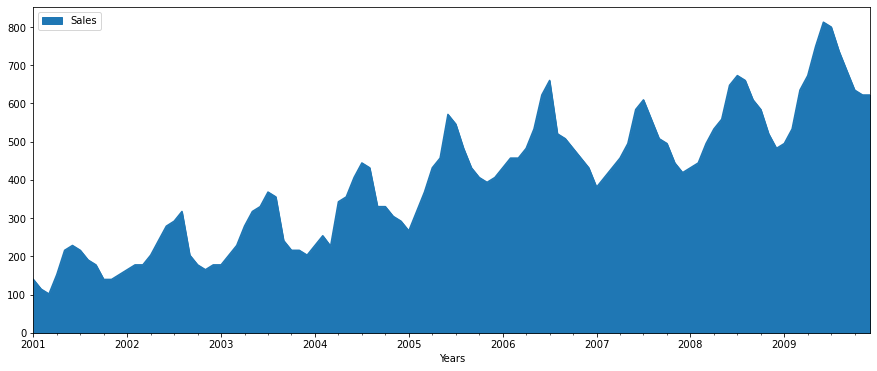

In [15]:
fig,ax = plt.subplots(figsize=(15,6))
dfp.plot(kind='area',ax=ax)
plt.show()

## 3.2 Stacked Area Plot

The stacked area plot is similar to the stacked bar plot and we will use the same data to visualize the stacked area plot. The intuition behind that is also the same as a stacked bar plot i.e., we can visualize each quarter sales with respective color and sum of all quarter values equal to total sales in that year.

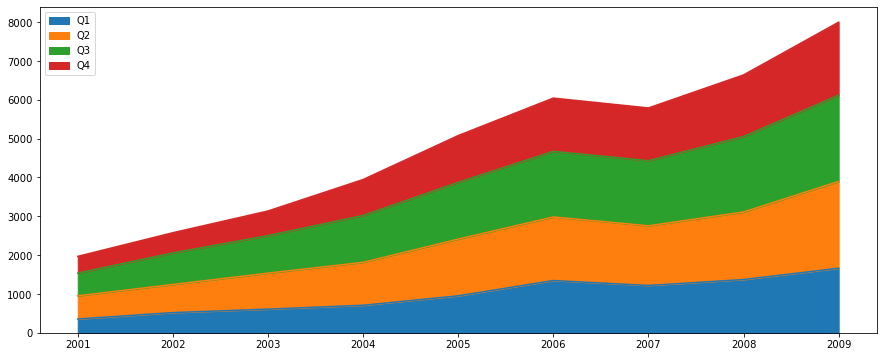

In [16]:
fig,ax = plt.subplots(figsize=(15,6))
df_sales.plot(kind='area',ax=ax,stacked=True)
plt.show()

## 3.3 Proposition Area Plot

In the proposition area plot, we can visualize the sales or values on the same scale wherein the stacked bar plot we sum the area to get the total sales.

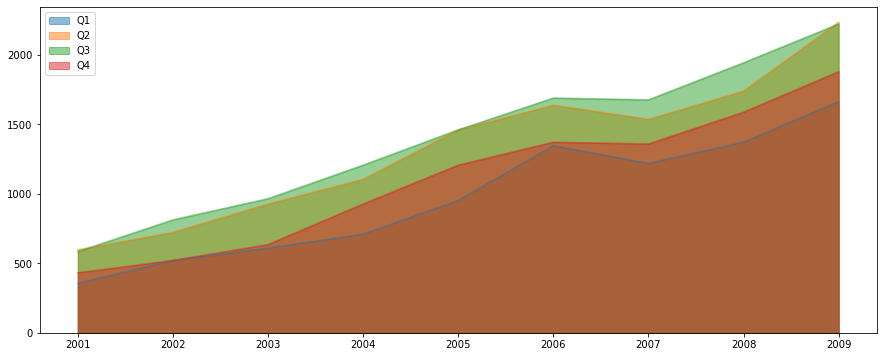

In [17]:
fig,ax = plt.subplots(figsize=(15,6))
df_sales.plot(kind='area',ax=ax,stacked=False)
plt.show()

# 4. Heatmap


Heatmap is a powerful way to visualize all your data in one chart. From the chart, we are plotting complete data for all the sales in each quarter and year. It the clear that where we are having high sales and least sale can be easily identified with heatmap.

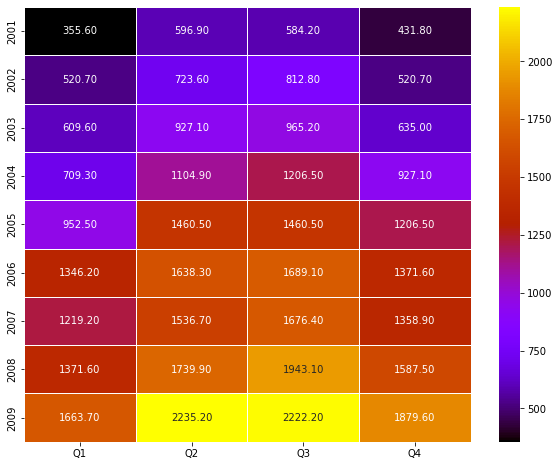

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(df_sales,annot=True,fmt='.2f',cmap='gnuplot',linewidths=1)
plt.show()

Above charts are the most commonly used charts to get insights from the data.

There are a lot more visualization charts for time series data. 